<h2>Импортируем данные и просматриваем первые 5 строк</h2>

In [1]:
import pandas as pd



data = pd.read_csv("churn.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<h2>Проверяем, есть ли дубликаты в датасете</h2>

In [2]:
data.duplicated().sum()

0

<h2>Проверяем, есть ли пустые ячейки в датасете</h2>

In [3]:
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

<h2>Посмотрим, какого типа каждый столбец</h2>

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
<h2>В датасете есть столбцы, которые совсем никак не влияют на результат. Такими столбцами являются RowNnumber, CustomerId, Surname. Остальные столбцы оставляем, так как они могут влиять на результат</h2>

In [6]:
data = data.drop(columns=["RowNumber",	"CustomerId",	"Surname"])
data.sample(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1855,785,France,Female,47,9,122031.55,1,1,1,33823.50,1
4604,681,France,Male,25,5,0.00,1,0,1,90860.97,0
7871,676,France,Female,36,3,91711.59,1,1,1,95393.43,0
4093,764,Spain,Female,48,1,75990.97,1,1,0,158323.81,1
5513,708,France,Female,33,8,0.00,2,0,1,15246.83,0
4432,621,Spain,Male,33,4,0.00,2,1,1,40299.23,0
1965,612,France,Female,33,9,0.00,1,0,0,142797.50,1
5469,723,France,Male,21,4,0.00,2,0,0,24847.02,0
181,510,France,Male,65,2,0.00,2,1,1,48071.61,0
696,445,Spain,Male,62,1,64119.38,1,1,1,76569.64,1


<h2>Разбиваем данные на отклик и обучающую выборку. Для категориальных столбцов используем one-hot-encoding</h2>

In [9]:
Y = data['Exited']

categorials = ["Geography",	"Gender"]
numerics = ["CreditScore", "Age",	"Tenure",	"Balance",	"NumOfProducts",	"HasCrCard",	"IsActiveMember",	"EstimatedSalary"]

dummy_features = pd.get_dummies(data[categorials])

X = pd.concat([data[numerics], dummy_features], axis=1)
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,0,1,0,0,1


<h2>Посмотрим, как ведут себя данные на графиках</h2>

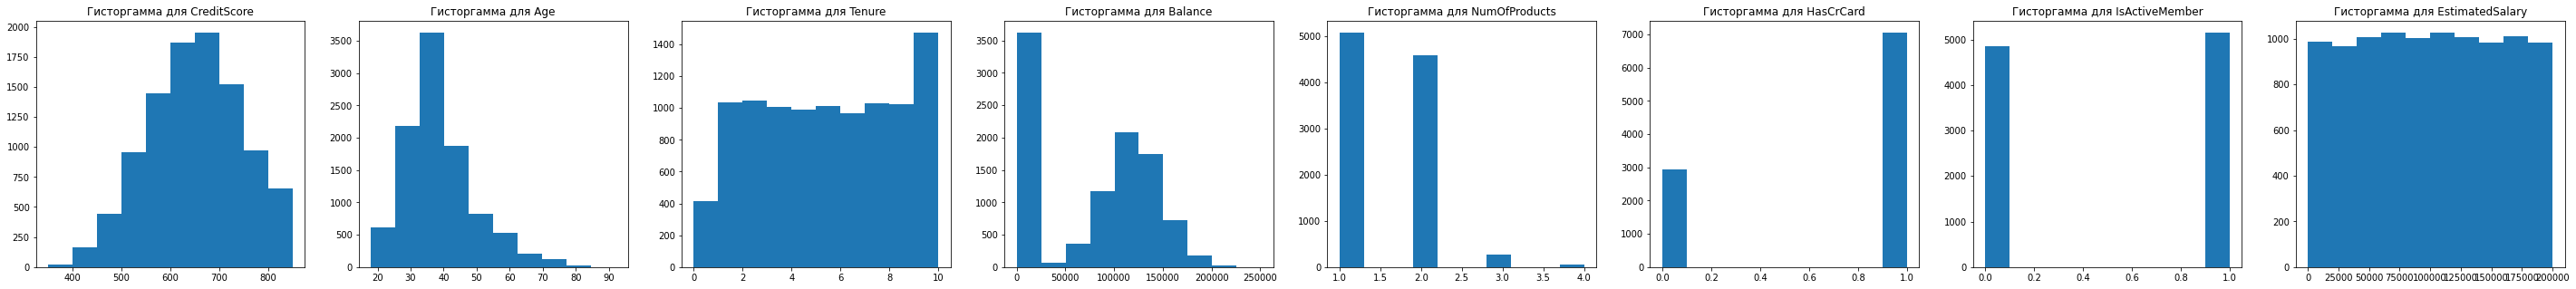

In [14]:
from matplotlib import pyplot as plt


fig, ax = plt.subplots(1, 8, figsize=(50, 5))
for i in range(len(numerics)):
    ax[i].set_title(f'Гисторгамма для {numerics[i]}')
    ax[i].hist(data[numerics[i]])
plt.show()

<h2>Посмотрим корреляцию между столбцами с помощью тепловой карты. Здесь уже можно увидеть некоторые зависимости между столбцами. Например, IsActiveMember и Age могут находиться в прямой зависимости.</h2>

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt


corr_digit = X[numerics].corr()
corr_digit

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000


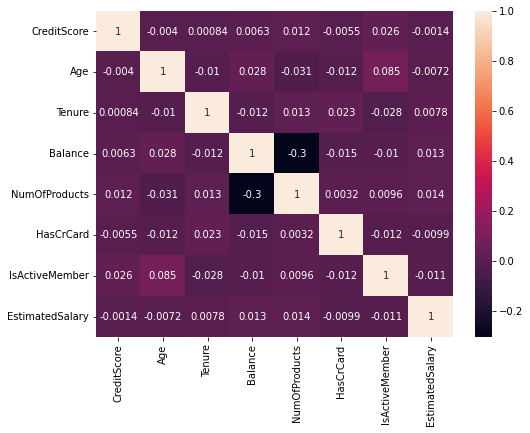

In [12]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_digit, annot=True)
plt.show()

<h2>Делим данные на обучающую и тестовую выборки и обучаем логистическую регрессию. Как видно по результатам, модель очень хорошо работает на предсказании 0 и не работает на предсказании 1. Это очень плохо. Будем дальше работать с данными.</h2>

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)



from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

logress = LogisticRegression()
logress.fit(X_train, y_train)

train_pred = logress.predict(X_train)
test_pred = logress.predict(X_test)

print('Train metrics:')
print(classification_report(train_pred, y_train))
print('-----------------')
print('Test metrics:')
print(classification_report(test_pred, y_test))


Train metrics:
              precision    recall  f1-score   support

           0       1.00      0.80      0.89      8000
           1       0.00      0.00      0.00         0

    accuracy                           0.80      8000
   macro avg       0.50      0.40      0.44      8000
weighted avg       1.00      0.80      0.89      8000

-----------------
Test metrics:
              precision    recall  f1-score   support

           0       1.00      0.80      0.89      2000
           1       0.00      0.00      0.00         0

    accuracy                           0.80      2000
   macro avg       0.50      0.40      0.44      2000
weighted avg       1.00      0.80      0.89      2000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMe

<h2>Посмотрим, есть ли дисбаланс в откликах. Оказалось, что количество 1 почти в 5 раз меньше количества 0</h2>

In [15]:
y_train.value_counts()

0    6370
1    1630
Name: Exited, dtype: int64

In [16]:
y_train.value_counts(normalize=True)

0    0.79625
1    0.20375
Name: Exited, dtype: float64

<h2>Используем upsampling, чтобы вручную привести данные к балансу</h2>

In [50]:
# upsampling

upsampling_counts = int(X_train.shape[0] * 0.6)
upsampling_df = X_train[y_train == 1].sample(upsampling_counts, replace=True)

sampling_df = pd.concat([X_train, upsampling_df])
sampling_y_train = Y.loc[sampling_df.index].reset_index(drop=True)
sampling_df = sampling_df.reset_index(drop=True)

In [51]:
sampling_y_train.value_counts(normalize=True)

1    0.502344
0    0.497656
Name: Exited, dtype: float64

<h2>Обучаем модель и смотрим на результат. Предсказания для 1 стали гораздо лучше</h2>

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

logress = LogisticRegression()
logress.fit(sampling_df, sampling_y_train)

train_pred = logress.predict(sampling_df)
test_pred = logress.predict(X_test)

print('Train metrics:')
print(classification_report(train_pred, sampling_y_train))
print('-----------------')
print('Test metrics:')
print(classification_report(test_pred, y_test))

Train metrics:
              precision    recall  f1-score   support

           0       0.65      0.67      0.66      6186
           1       0.68      0.66      0.67      6614

    accuracy                           0.66     12800
   macro avg       0.66      0.66      0.66     12800
weighted avg       0.66      0.66      0.66     12800

-----------------
Test metrics:
              precision    recall  f1-score   support

           0       0.64      0.89      0.74      1146
           1       0.68      0.32      0.44       854

    accuracy                           0.65      2000
   macro avg       0.66      0.61      0.59      2000
weighted avg       0.66      0.65      0.61      2000



<h2>Теперь попробуем сделать downsampling</h2>

In [36]:
# downsampling

downsampling_counts = int(X_train.shape[0] * 0.2)
downsampling_df = X_train[y_train == 0].sample(downsampling_counts)

sampling_df = pd.concat([X_train[y_train == 1], downsampling_df])
sampling_y_train = Y.loc[sampling_df.index].reset_index(drop=True)
sampling_df = sampling_df.reset_index(drop=True)

In [37]:
sampling_y_train.value_counts(normalize=True)

1    0.504644
0    0.495356
Name: Exited, dtype: float64

<h2>Обучаем модель и сравниваем с предыдущими результатами. Результаты получились примерно оодинаковыми, что при использовании upsampling, что при downsampling</h2>

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

logress = LogisticRegression()
logress.fit(sampling_df, sampling_y_train)

train_pred = logress.predict(sampling_df)
test_pred = logress.predict(X_test)

print('Train metrics:')
print(classification_report(train_pred, sampling_y_train))
print('-----------------')
print('Test metrics:')
print(classification_report(test_pred, y_test))

Train metrics:
              precision    recall  f1-score   support

           0       0.64      0.66      0.65      1543
           1       0.68      0.65      0.67      1687

    accuracy                           0.66      3230
   macro avg       0.66      0.66      0.66      3230
weighted avg       0.66      0.66      0.66      3230

-----------------
Test metrics:
              precision    recall  f1-score   support

           0       0.63      0.89      0.74      1124
           1       0.69      0.32      0.44       876

    accuracy                           0.64      2000
   macro avg       0.66      0.61      0.59      2000
weighted avg       0.66      0.64      0.61      2000



In [42]:
from sklearn.model_selection import cross_val_score

logress = LogisticRegression()
results = cross_val_score(logress, sampling_df, sampling_y_train, cv=10, n_jobs=-1)
results

array([0.65325077, 0.65944272, 0.62848297, 0.67801858, 0.6501548 ,
       0.66563467, 0.56037152, 0.625387  , 0.65325077, 0.59133127])